In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
df1 = pd.read_csv('dadosConcentracao.csv', header=None)
df1

,0,1,2
0,0,100,0
1,1,86,7
2,2,84,8
3,3,78,11
4,4,78,11
...,...,...,...
18713,18713,2,49
18714,18714,2,49
18715,18715,2,49
18716,18716,2,49


In [3]:
eixo_x = df1[0].tolist()

In [4]:
eixo_y1 = df1[1].tolist()
eixo_y2 = df1[2].tolist()

eixo_y2c = []

for i in eixo_y2:
    c = i*2
    eixo_y2c.append(c)

Text(0.5, 1.0, 'Relação Reagentes x Produtos')

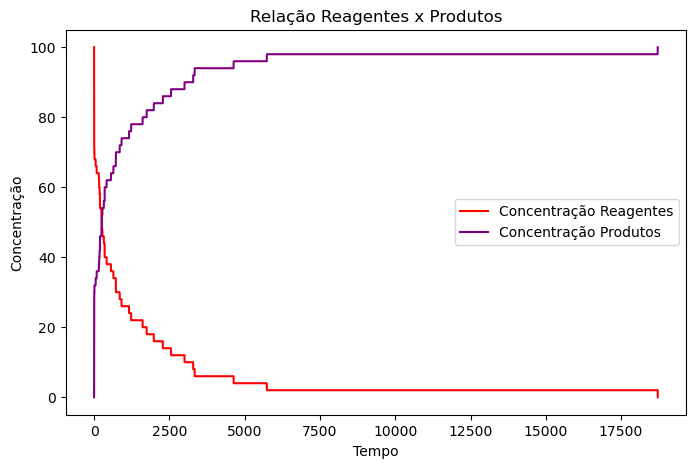

In [5]:
plt.figure(figsize=(8,5))

plt.plot(eixo_x, eixo_y1, label='Concentração Reagentes', linestyle='-', color='red')
plt.plot(eixo_x, eixo_y2c, label='Concentração Produtos', linestyle='-', color='purple')

plt.xlabel('Tempo')
plt.ylabel('Concentração')

plt.legend()

plt.title('Relação Reagentes x Produtos')

In [6]:
n = len(eixo_y1)
step = 500
x = range(0,n)[::step]

In [42]:
tck1 = interpolate.splrep(x, eixo_y1[::step], s=20, k=5)
tck2 = interpolate.splrep(x, eixo_y2c[::step], s=20, k=5)

In [43]:
x_new = np.linspace(min(x), max(x), 300)
y1_fit = interpolate.BSpline(*tck1)(x_new)
y2_fit = interpolate.BSpline(*tck2)(x_new)

/tmp/ipykernel_156697/1159479951.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-c" (-> color='c'). The keyword argument will take precedence.
  plt.plot(x_new, y1_fit, '-c', label="Reagente", color='red')
/tmp/ipykernel_156697/1159479951.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-c" (-> color='c'). The keyword argument will take precedence.
  plt.plot(x_new, y2_fit, '-c', label="Produto",color='purple')


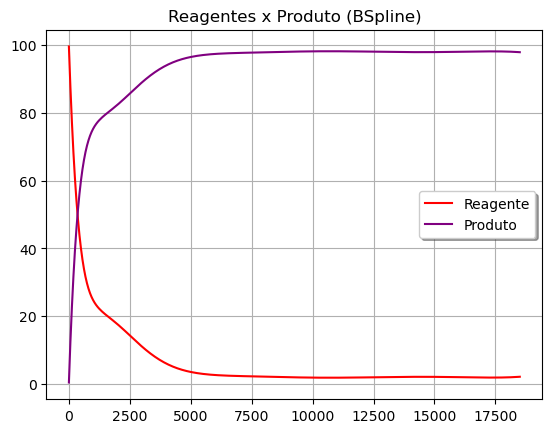

In [44]:
plt.title("Reagentes x Produto (BSpline)")
#plt.plot(x, eixo_y1[::step], 'ro', label="original")
#plt.plot(x, eixo_y2[::step], 'ro', label="original")
plt.plot(x_new, y1_fit, '-c', label="Reagente", color='red')
plt.plot(x_new, y2_fit, '-c', label="Produto",color='purple')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 